## Function to create a dictionary with keys as path for hdf5 format

In [2]:
simple_dict_test={'key_1':'value_key_1',
                  'key_2':{'key_21':{211:'value_key_211',
                                     212:[2,1,2],
                                     213:[2,1,3]},
                           'key_22':{221:'value_key_221',
                                     222:[2,2,2],
                                     223:[2,2,3]}}}

In [3]:
simple_dict_test

{'key_1': 'value_key_1',
 'key_2': {'key_21': {211: 'value_key_211', 212: [2, 1, 2], 213: [2, 1, 3]},
  'key_22': {221: 'value_key_221', 222: [2, 2, 2], 223: [2, 2, 3]}}}

In [1]:
import copy

def searching_for_values(old_dict,old_key,current_dict,key_path):
    
    if type(current_dict)!=dict:
        value=current_dict
        path=key_path
        
        del old_dict[old_key]
        
        return (path,value);
    
    elif current_dict=={}:
        del old_dict[old_key]
        
        to_return="leaf with no value"
        
        return to_return;
    
    else:
        keys_list=list(current_dict.keys())
        key=keys_list[0]
        key_path=key_path+'/'+str(key)
        old_dict=current_dict
        old_key=key
        current_dict=current_dict[key]
        
        return searching_for_values(old_dict,old_key,current_dict,key_path);
    
    
def from_multidim_dict_to_dict_with_paths(multidim_dict):

    #create a copy of the dict to explore
    multidim_dict_copy=copy.deepcopy(multidim_dict)

    #create a flat dictionary with path as keys and real data to store as value
    dict_with_paths={}
        
    #create the list of keys in the first dictionary
    keys_list=list(multidim_dict_copy.keys())
    key_path=''
    
    while keys_list!=[]:

        current_dict=multidim_dict_copy
        
        #Search for values in the tree
        old_dict=current_dict
        old_key=keys_list[0]
        value_found=searching_for_values(old_dict,old_key,current_dict,key_path)
        
        print(value_found)
        
        #Write value in dictionary with paths
        if value_found!="leaf with no value":
            dict_with_paths[value_found[0]]=value_found[1]
            
        #update the key list
        key_path=''
        keys_list=list(multidim_dict_copy.keys())
        
    else:
        print("Dictionary with paths as keys as needed in HDF5 format is ready")

    return dict_with_paths;    

In [5]:
dict_with_paths=from_multidim_dict_to_dict_with_paths(simple_dict_test)

('/key_1', 'value_key_1')
('/key_2/key_21/211', 'value_key_211')
('/key_2/key_21/212', [2, 1, 2])
('/key_2/key_21/213', [2, 1, 3])
leaf with no value
('/key_2/key_22/221', 'value_key_221')
('/key_2/key_22/222', [2, 2, 2])
('/key_2/key_22/223', [2, 2, 3])
leaf with no value
leaf with no value
Dictionary with paths as keys as needed in HDF5 format is ready


In [6]:
dict_with_paths

{'/key_1': 'value_key_1',
 '/key_2/key_21/211': 'value_key_211',
 '/key_2/key_21/212': [2, 1, 2],
 '/key_2/key_21/213': [2, 1, 3],
 '/key_2/key_22/221': 'value_key_221',
 '/key_2/key_22/222': [2, 2, 2],
 '/key_2/key_22/223': [2, 2, 3]}

In [34]:
import h5py

current_path_dir=os.getcwd()
path_for_saving=current_path_dir+"\\Saved objects"
path_for_saving

hdf5_file_name_1="test_multidict_stored.hdf5"
hdf5_file=h5py.File(path_for_saving+"\\"+hdf5_file_name_1,'a')

for path in dict_with_paths:
    
    print(path)
    hdf5_file.create_dataset(path,data=dict_with_paths[path])

hdf5_file.close()

/key_1
/key_2/key_21/211
/key_2/key_21/212
/key_2/key_21/213
/key_2/key_22/221
/key_2/key_22/222
/key_2/key_22/223


In [33]:
#hdf5_file.clear()

## Function to retrieve a multidictionary from HFD5 file

In [2]:
hdf5_file_name_1="test_multidict_stored.hdf5"
hdf5_file_path=path_for_saving+"\\"+hdf5_file_name_1
#hdf5_file=h5py.File(path_for_saving+"\\"+hdf5_file_name_1,'a')

NameError: name 'path_for_saving' is not defined

In [3]:
#import h5py

def h5py_dataset_iterator(g, prefix=''):
    for key in g.keys():
        item = g[key]
        path = '{}/{}'.format(prefix, key)
        if isinstance(item, h5py.Dataset): # test for dataset
            yield (path, item)
        elif isinstance(item, h5py.Group): # test for group (go down)
            yield from h5py_dataset_iterator(item, path)

In [25]:
list_dataset_path=[]

with h5py.File(path_for_saving+"\\"+hdf5_file_name_1,'r') as f:
    for (path, dset) in h5py_dataset_iterator(f):
        list_dataset_path.append(path)

list_dataset_path

['/key_1',
 '/key_2/key_21/211',
 '/key_2/key_21/212',
 '/key_2/key_21/213',
 '/key_2/key_22/221',
 '/key_2/key_22/222',
 '/key_2/key_22/223']

In [4]:
def h5py_dataset_iterator(g, prefix=''):
    for key in g.keys():
        item = g[key]
        path = '{}/{}'.format(prefix, key)
        if isinstance(item, h5py.Dataset): # test for dataset
            yield (path, item)
        elif isinstance(item, h5py.Group): # test for group (go down)
            yield from h5py_dataset_iterator(item, path)


def create_multidict_from_path(path, obj, multidict):
    
    number_of_group=path.count('/')
    hierarchic_key_list=[key for key in list(path.rsplit('/', number_of_group)) if key!='']
    last_name=hierarchic_key_list[-1:][0]
    
    multidict_modif=multidict
    
    for key in hierarchic_key_list:
        
        if key!=last_name:
            
            if key not in multidict_modif.keys():
                multidict_modif[key]={}
            multidict_modif=multidict_modif[key]
        
        else:
            multidict_modif[key]=obj
    
    return multidict;
            


def from_hdf5_group_to_multidict(hdf5_file_path,group_full_path):
    
    hdf5_file=h5py.File(hdf5_file_path,'r')
    obj=hdf5_file[group_full_path]
    last_name_group=group_full_path.rsplit('/', 1)[1]
    
    matrix_path_already_done=[]
    
    # Use csr builder if biosphere_matrix or technosphere_matrix and write directly the object
    if '_matrix' in last_name_group:
        obj=hdf5_to_csr_matrix(hdf5_file_path,group_full_path)
        multidict=obj
    
    # if group is a dataset write directly the object
    elif isinstance(obj, h5py.Dataset):
        multidict=obj
        
    else:
        
        multidict={}
        
        for (path, dset) in h5py_dataset_iterator(obj):
            
            if path not in matrix_path_already_done:
            
                if '_matrix' in path:                
                    matrix_path=path.rsplit('_matrix/', 1)[0]
                    matrix_full_path=group_full_path+matrix_path
                    obj=hdf5_to_csr_matrix(hdf5_file_path,matrix_full_path)

                    multidict=create_multidict_from_path(matrix_path, obj, multidict)
                    matrix_path_already_done.append(matrix_path)

                else:
                    multidict=create_multidict_from_path(path, dset[()], multidict)
                    
    hdf5_file.close()
    
    return multidict;

    

In [89]:
hdf5_file_name_1="test_multidict_stored.hdf5"
hdf5_file_path=path_for_saving+"\\"+hdf5_file_name_1
group_full_path='/' #if we want to scan the entire file, just put '/'

multidict_test=from_hdf5_group_to_multidict(hdf5_file_path,group_full_path)
multidict_test

{'key_1': 'value_key_1',
 'key_2': {'key_21': {'211': 'value_key_211',
   '212': array([2, 1, 2]),
   '213': array([2, 1, 3])},
  'key_22': {'221': 'value_key_221',
   '222': array([2, 2, 2]),
   '223': array([2, 2, 3])}}}

http://deusyss.developpez.com/tutoriels/Python/hdf5/

http://docs.h5py.org/en/latest/quick.html

In [5]:
import brightway2 as bw
import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd     # "high-performance, easy-to-use data structures and data analysis tools" for Python
import csv
import stats_arrays
import scipy as sp
import pandas as pd
import pickle
import h5py
import time
import h5py

## Create an HDF5 file object

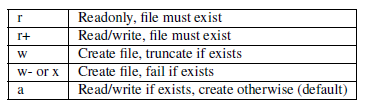

In [6]:
current_path_dir=os.getcwd()
path_for_saving=current_path_dir+"\\Saved objects"
path_for_saving

'C:\\Users\\Laure\\Brightway - Notebooks and code\\Monte-Carlo\\Saved objects'

In [3]:
hdf5_file_name="testfile.hdf5"
hdf5_file_test=h5py.File(path_for_saving+"\\"+hdf5_file_name,"w")

## Create group dans subgroup

In [5]:
group_test_1=hdf5_file_test.create_group("group_1")
subgroup_test_11=group_test_1.create_group("subgroup_1")

In [7]:
group_test_1.name, subgroup_test_11.name, subgroup_test_11.parent.name

('/group_1', '/group_1/subgroup_1', '/group_1')

## Create dataset

First, create an empty dataset.  Datasets can be chucked (split into different file for storing). Compression is also available(f.create_dataset("zipped", (100, 100), compression="gzip")) Dataset can also be resized (dataset.resize()).

In [20]:
dataset_name="dataset_1"
dataset_shape=(100,)
dataset_dtype="i"
dataset_test_1=subgroup_test_11.create_dataset(dataset_name,dataset_shape,dataset_dtype)

RuntimeError: Unable to create link (Name already exists)

Or, create a dataset directly from some data 

In [10]:
dataset_name="dataset_1_from_data"
data=[4,7,9] ##?
dataset_test_1=subgroup_test_11.create_dataset(dataset_name,data=data)

In [11]:
dataset_test_1.dtype

dtype('float32')

Create a dataset with a full path is also possible, even directly from the file

In [25]:
dataset_name=subgroup_test_11.name+'/'+"dataset_2"
dataset_shape=(100,)
dataset_dtype="i"
dataset_test_2=subgroup_test_11.create_dataset(dataset_name,dataset_shape,dataset_dtype)

In [28]:
dataset_test_2.name

'/group_1/subgroup_1/dataset_2'

## Write and read in dataset

To retrieve the contents of a scalar dataset, you can use the same syntax as in NumPy: result = dset[()]. In
other words, index into the dataset using an empty tuple.

In [21]:
dataset_test_1=[5,9,243,78]

In [24]:
dataset_test_1,dataset_test_1[1]

([5, 9, 243, 78], 9)

In [32]:
dataset_test_1_read=hdf5_file_test['/group_1/subgroup_1/dataset_1']
dataset_test_1_read

<HDF5 dataset "dataset_1": shape (100,), type "<i4">

In [33]:
dataset_test_1_read=[56,987,97986876]

In [34]:
dataset_test_1_read2=hdf5_file_test['/group_1/subgroup_1/dataset_1']
dataset_test_1_read

[56, 987, 97986876]

In [ ]:
dataset_test_1_read2=hdf5_file_test['/group_1/subgroup_1/dataset_1']
group_1=hdf5_file_test['/group_1']
dataset_test_1_read2=group_1['/subgroup_1/dataset_1']
dataset_test_1_read2[()]

## Write and read attributes
Attributes are linked to a hdf5 file or a group or a dataset

In [35]:
hdf5_file_test.attrs['numero']=1

In [36]:
hdf5_file_test.attrs['numero']

1

In [73]:
[attribut for attribut in hdf5_file_test.attrs.keys()]

['numero']

In [72]:
hdf5_file_test['group_1'].attrs['attr1']=(1,7)

In [74]:
[attribut for attribut in hdf5_file_test['group_1'].attrs.keys()]

['attr1']

In [75]:
hdf5_file_test['group_1'].create_dataset('test1',data=(1,9))

<HDF5 dataset "test1": shape (2,), type "<i4">

In [77]:
hdf5_file_test['/group_1/test1'].attrs['attr2']=8

In [78]:
[attribut for attribut in hdf5_file_test['/group_1/test1'].attrs.keys()]

['attr2']

In [79]:
[attribut for attribut in hdf5_file_test['group_1'].attrs.keys()]

['attr1']

# Test to store information from Brightway with HDF5 format

In [7]:
def pickle_save(file_path_root,object_name_to_save,file_name):
    
    complete_file_path=file_path_root+'\\'+file_name+'.p'
    
    pickle.dump( object_name_to_save, open( complete_file_path, "wb" ) )
    
    return;


def pickle_load(file_path_root,file_name):
    
    complete_file_path=file_path_root+'\\'+file_name+'.p'
    
    return pickle.load( open( complete_file_path, "rb" ) );

In [23]:
dict_bw_1act_10it=pickle_load(path_for_saving,'dict_act_MC_LCA_object_A_B_only_10it_1act')
dict_bw_1act_10it_params=pickle_load(path_for_saving,'dict_act_MC_LCA_object_A_B_only_10it_1ct_params')

NameError: name 'path_for_saving' is not defined

In [196]:
dict_bw_1act_10it

{'Monte Carlo LCI results': {0: {'biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 353369 stored elements in Compressed Sparse Row format>,
   'technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 147427 stored elements in Compressed Sparse Row format>},
  1: {'biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 353369 stored elements in Compressed Sparse Row format>,
   'technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 147427 stored elements in Compressed Sparse Row format>},
  2: {'biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 353369 stored elements in Compressed Sparse Row format>,
   'technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 147427 stored elements in Compressed Sparse Row format>},
  3: {'biosphere_matrix': <1960x13831 sparse matrix of 

In [197]:
dict_with_paths_bw=from_multidim_dict_to_dict_with_paths_2(dict_bw_1act_10it)
dict_with_paths_bw

('/iterations', 10)
('/activity key', ('ecoinvent 3.3 cutoff', 'f171dd5c543667e25ad52e80efb83f0c'))
('/classifications', [('EcoSpold01Categories', 'biomass/fuels'), ('ISIC rev.4 ecoinvent', '3520:Manufacture of gas; distribution of gaseous fuels through mains')])
('/functional unit', 1)
('/Monte Carlo LCI results/0/biosphere_matrix', <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 353369 stored elements in Compressed Sparse Row format>)
('/Monte Carlo LCI results/0/technosphere_matrix', <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 147427 stored elements in Compressed Sparse Row format>)
leaf with no value
('/Monte Carlo LCI results/1/biosphere_matrix', <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 353369 stored elements in Compressed Sparse Row format>)
('/Monte Carlo LCI results/1/technosphere_matrix', <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 147427 stored elements in Compressed Sparse Row format>)
l

{'/Monte Carlo LCI results/0/biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
 	with 353369 stored elements in Compressed Sparse Row format>,
 '/Monte Carlo LCI results/0/technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
 	with 147427 stored elements in Compressed Sparse Row format>,
 '/Monte Carlo LCI results/1/biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
 	with 353369 stored elements in Compressed Sparse Row format>,
 '/Monte Carlo LCI results/1/technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
 	with 147427 stored elements in Compressed Sparse Row format>,
 '/Monte Carlo LCI results/2/biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
 	with 353369 stored elements in Compressed Sparse Row format>,
 '/Monte Carlo LCI results/2/technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
 	with 147427 stored

In [135]:
len(dict_with_paths_bw)

6

In [136]:
dict_bw_1act_10it_params

{'LCI params values': {0: {'bio_sample': array([  5.09762163e-05,   8.86651494e-06,   2.69043799e-07, ...,
            8.31542918e-05,   3.74562893e-03,   4.20860582e-03]),
   'tech_sample': array([ 1.        ,  1.        ,  1.        , ..., -0.99901086,
           0.95062798,  0.99158311])},
  1: {'bio_sample': array([  7.23315739e-05,   3.93809315e-06,   3.21284386e-07, ...,
            2.01399155e-04,   2.47075750e-03,   4.48717655e-03]),
   'tech_sample': array([ 1.        ,  1.        ,  1.        , ..., -0.99901086,
           0.95062798,  0.99158311])},
  2: {'bio_sample': array([  8.13846742e-05,   4.32979271e-06,   2.57368650e-07, ...,
            6.59441890e-05,   3.88860805e-03,   3.83476544e-03]),
   'tech_sample': array([ 1.        ,  1.        ,  1.        , ..., -0.99901086,
           0.95062798,  0.99158311])},
  3: {'bio_sample': array([  4.99777216e-05,   6.12421214e-06,   2.81638689e-07, ...,
            1.59821993e-04,   4.07884432e-03,   5.19672692e-03]),
   'tech

In [198]:
dict_with_paths_bw_params=from_multidim_dict_to_dict_with_paths_2(dict_bw_1act_10it_params)
dict_with_paths_bw_params

('/iterations', 10)
('/activity key', ('ecoinvent 3.3 cutoff', 'f171dd5c543667e25ad52e80efb83f0c'))
('/classifications', [('EcoSpold01Categories', 'biomass/fuels'), ('ISIC rev.4 ecoinvent', '3520:Manufacture of gas; distribution of gaseous fuels through mains')])
('/functional unit', 1)
('/Monte Carlo LCI results/0/biosphere_matrix', <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 353369 stored elements in Compressed Sparse Row format>)
('/Monte Carlo LCI results/0/technosphere_matrix', <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 147427 stored elements in Compressed Sparse Row format>)
leaf with no value
('/Monte Carlo LCI results/1/biosphere_matrix', <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 353369 stored elements in Compressed Sparse Row format>)
('/Monte Carlo LCI results/1/technosphere_matrix', <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 147427 stored elements in Compressed Sparse Row format>)
l

{'/LCI params values/0/bio_sample': array([  5.09762163e-05,   8.86651494e-06,   2.69043799e-07, ...,
          8.31542918e-05,   3.74562893e-03,   4.20860582e-03]),
 '/LCI params values/0/tech_sample': array([ 1.        ,  1.        ,  1.        , ..., -0.99901086,
         0.95062798,  0.99158311]),
 '/LCI params values/1/bio_sample': array([  7.23315739e-05,   3.93809315e-06,   3.21284386e-07, ...,
          2.01399155e-04,   2.47075750e-03,   4.48717655e-03]),
 '/LCI params values/1/tech_sample': array([ 1.        ,  1.        ,  1.        , ..., -0.99901086,
         0.95062798,  0.99158311]),
 '/LCI params values/2/bio_sample': array([  8.13846742e-05,   4.32979271e-06,   2.57368650e-07, ...,
          6.59441890e-05,   3.88860805e-03,   3.83476544e-03]),
 '/LCI params values/2/tech_sample': array([ 1.        ,  1.        ,  1.        , ..., -0.99901086,
         0.95062798,  0.99158311]),
 '/LCI params values/3/bio_sample': array([  4.99777216e-05,   6.12421214e-06,   2.81638689

In [60]:
dict_bw_1act_10it

{'Monte Carlo LCI results': {1: {'biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 353369 stored elements in Compressed Sparse Row format>,
   'technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 147427 stored elements in Compressed Sparse Row format>},
  2: {'biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 353369 stored elements in Compressed Sparse Row format>,
   'technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 147427 stored elements in Compressed Sparse Row format>},
  3: {'biosphere_matrix': <1960x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 353369 stored elements in Compressed Sparse Row format>,
   'technosphere_matrix': <13831x13831 sparse matrix of type '<class 'numpy.float64'>'
   	with 147427 stored elements in Compressed Sparse Row format>},
  4: {'biosphere_matrix': <1960x13831 sparse matrix of 

In [61]:
hdf5_file_name="test_bw.hdf5"
hdf5_file_bw_test=h5py.File(path_for_saving+"\\"+hdf5_file_name,"w")

In [65]:
dataset=hdf5_file_bw_test.create_dataset('/Monte Carlo LCI results/0/biosphere_matrix',data=dict_with_paths_bw['/Monte Carlo LCI results/0/biosphere_matrix'])
    

TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [66]:
dict_with_paths_bw['/Monte Carlo LCI results/0/biosphere_matrix']

<1960x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 353369 stored elements in Compressed Sparse Row format>

In [67]:
type(dict_with_paths_bw['/Monte Carlo LCI results/0/biosphere_matrix'])

scipy.sparse.csr.csr_matrix

In [ ]:
hdf5_file_bw_test.create_dataset

## Transform sparse matrix to hdf5 format and retrieve it

How to store scipy csr matrix in HDF5 format : https://stackoverflow.com/questions/24947028/whats-the-best-way-to-serialize-a-large-scipy-sparse-matrix, https://stackoverflow.com/questions/11129429/storing-numpy-sparse-matrix-in-hdf5-pytables/22589030#22589030, https://myjourneyasadatascientist.com/2015/09/11/hdf5-pytables-and-sparse-matrices-optimizing-calculations/, https://stackoverflow.com/questions/43390038/storing-scipy-sparse-matrix-as-hdf5


In [ ]:
# Raw code for transforming sparse matrix to hdf5 and retrieve it

import numpy as np
import h5py
from scipy import sparse

M = sparse.random(10,10,.2, 'csr')
print(repr(M))

print(M.data)
print(M.indices)
print(M.indptr)

f = h5py.File('sparse.h5','w')
g = f.create_group('Mcsr')
g.create_dataset('data',data=M.data)
g.create_dataset('indptr',data=M.indptr)
g.create_dataset('indices',data=M.indices)
g.attrs['shape'] = M.shape
f.close()

f = h5py.File('sparse.h5','r')
print(list(f.keys()))
print(list(f['Mcsr'].keys()))

g2 = f['Mcsr']
print(g2.attrs['shape'])

M1 = sparse.csr_matrix((g2['data'][:],g2['indices'][:],
    g2['indptr'][:]), g2.attrs['shape'])
print(repr(M1))
print(np.allclose(M1.A, M.A))
f.close()

In [68]:
csr_matrix_example=dict_with_paths_bw['/Monte Carlo LCI results/0/biosphere_matrix']

In [8]:
# function create a group containing all the information of a csr matrix scipy  

import scipy as sp

def csr_matrix_to_hdf5(csr,hdf5_file_path,group_full_path):
    
    # Retrieve or create the hdf5 file and the groups and subgroups
    hdf5_file=h5py.File(hdf5_file_path,'a')
    group=hdf5_file.require_group(group_full_path)
    
    # Create datasets containing values of csr matrix
    group.create_dataset('data',data=csr.data)
    group.create_dataset('indptr',data=csr.indptr)
    group.create_dataset('indices',data=csr.indices)
    group.attrs['shape']=csr.shape
    
    hdf5_file.close()
    
    return;
    
# function to rebuild csr matrix from hdf5 storage

def hdf5_to_csr_matrix(hdf5_file_path,group_full_path):
    
    # Access hdf5 file and storage group of the csr info
    hdf5_file=h5py.File(hdf5_file_path,'r')
    group=hdf5_file[group_full_path]
    
    #Rebuild csr matrix
    csr=sp.sparse.csr_matrix((group['data'][:],group['indices'][:],group['indptr'][:]), group.attrs['shape'])
    
    return csr;

In [81]:
csr=csr_matrix_example
hdf5_file_path=path_for_saving+'\\csr_test.hdf5'
group_full_path='/project_1/csr_1'

In [84]:
csr_matrix_to_hdf5(csr,hdf5_file_path,group_full_path)

In [87]:
csr_rebuild=hdf5_to_csr_matrix(hdf5_file_path,group_full_path)

In [88]:
csr_rebuild

<1960x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 353369 stored elements in Compressed Sparse Row format>

In [89]:
csr

<1960x13831 sparse matrix of type '<class 'numpy.float64'>'
	with 353369 stored elements in Compressed Sparse Row format>

In [95]:
csr!=csr_rebuild

<1960x13831 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>

In [96]:
hdf5_csr_file=h5py.File(hdf5_file_path,'r')

In [97]:
[key for key in hdf5_csr_file.keys()]

['project_1']

In [98]:
group=hdf5_csr_file[group_full_path]

In [100]:
data=group['data']

In [102]:
data.value

array([  6.14740129e-05,   4.99028010e-06,   2.76879007e-07, ...,
         1.80029136e-04,   3.42019997e-03,   3.42019997e-03])

## Transform an BW LCA dict to HDF5 and retrieve

For LCA objects: biosphere_dict, activity_dict, product_dict

In [31]:
def LCA_dict_to_hdf5(LCA_dict,hdf5_file_path,group_full_path):
    
    # Retrieve or create the hdf5 file and the groups and subgroups
    hdf5_file=h5py.File(hdf5_file_path,'a')
    group=hdf5_file.require_group(group_full_path)
    
    keys_list=[int(key) for key in LCA_dict.keys()]
    items_list=[item for item in LCA_dict.values()]
    
    # Create datasets containing values of csr matrix
    group.create_dataset('keys',data=keys_list)
    group.create_dataset('values',data=items_list)


    
    hdf5_file.close()
    
    return;
    
# function to rebuild csr matrix from hdf5 storage

def hdf5_to_LCA_dict(hdf5_file_path,group_full_path):
    
    # Access hdf5 file and storage group of the LCA_dict info
    hdf5_file=h5py.File(hdf5_file_path,'r')
    group=hdf5_file[group_full_path]
    
    #Rebuild LCA_dict
    LCA_dict={}
    
    i=0
    
    for key in group['keys']:
        LCA_dict[str(key)]=group['values'][i]
        i=i+1
    
    return LCA_dict;

In [11]:
test_dict={'2654': 122,'2667': 124534}

In [16]:
[key for key in test_dict.values()]

[122, 124534]

In [32]:
LCA_dict=test_dict
hdf5_file_path=path_for_saving+'\\LCA_dict_test.hdf5'
group_full_path='/test_dict_1'

LCA_dict_to_hdf5(LCA_dict,hdf5_file_path,group_full_path)

In [33]:
LCA_dict_test=hdf5_to_LCA_dict(hdf5_file_path,group_full_path)

In [34]:
LCA_dict_test

{'2654': 122, '2667': 124534}

In [35]:
test_dict == LCA_dict_test

True

## Test if values are modify in hdf5 while accesing the file

In [70]:
#Opening the file
hdf5_file_path=path_for_saving+'\\LCA_dict_test.hdf5'

hdf5_file=h5py.File(hdf5_file_path,'a')

In [71]:
#Access to dataset
dataset=hdf5_file['/test_dict/values']
dataset

<HDF5 dataset "values": shape (2,), type "<i4">

In [72]:
# Retrieve the content of dataset
values_of_dataset=dataset[()]
values_of_dataset

array([ 2, 78])

In [73]:
# Try to change the value of dataset
dataset=[0,1]
values_of_dataset=[3,87]
dataset, values_of_dataset

([0, 1], [3, 87])

In [74]:
# test of the value of dataset has changed
dataset_1=hdf5_file['/test_dict/values']
dataset_1

<HDF5 dataset "values": shape (2,), type "<i4">

In [75]:
# Retrieve the content of dataset
values_of_dataset_1=dataset_1[()]
values_of_dataset_1

#--> no change in hdf5 data 

array([ 2, 78])

In [76]:
# Modify the value of hdf5 dataset
dataset=hdf5_file['/test_dict/values']
dataset[...]=[4675,498] #The way to modify the value of dataset
dataset

<HDF5 dataset "values": shape (2,), type "<i4">

In [77]:
# Retrieve the content of dataset
values_of_dataset=dataset[()]
values_of_dataset

array([4675,  498])

In [78]:
#Access to dataset
dataset=hdf5_file['/test_dict/values']
dataset[()]

array([4675,  498])